# Assignment: 18-2-OLS-ordinary-least-squares

### Assignment: predicting house prices

Now, it's your turn to design your first regression model. 
- In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. 
- This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. 
- Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

Investigate the data, and do any necessary data cleaning.

Explore the data and find some variables that you think would be useful in predicting house prices.

Build your initial model using these features and estimate the parameters using OLS.
Spend up to 4 hours on this assignment. When you are done and have submitted a link to your notebook below, feel free to take a look at this example solution.


https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [8]:
#pip install sqlalchemy
#!pip install sqlalchemy
#!pip install psycopg2-binary

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')


In [42]:
#postgres_user = 'dsbc_student' 
#postgres_pw = '7*.8G9QH21' 
#postgres_host = '142.93.121.174' 
#postgres_port = '5432' 
#postgres_db = 'houseprices'

In [3]:
#engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
   # postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#housePrices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
#engine.dispose()

### There is something wrong with sql library - its not working so I am loading the data manually 
### and its a pain
housePrices_df = pd.read_csv('housing-train.csv')

housePrices_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [44]:
housePrices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Extracting feartures from the dataset - some variables that you think would be useful in predicting house prices.


neighborhood
Utilities
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
OverallCond: Overall condition rating
YearBuilt: Original construction date
CentralAir: Central air conditioning
Bedroom: Number of bedrooms above basement level
GarageType: Garage location
EnclosedPorch: Enclosed porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
Fence: Fence quality
SaleType: Type of sale
SaleCondition: Condition of sale

In [4]:
non_numeric_columns = housePrices_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
The number of non-numerical columns is 43


In [5]:
numeric_columns = housePrices_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The number of numerical columns is 38


In [6]:
#housePrices_df2 = housePrices_df['neighborhood','Utilities', 'Condition1','Condition2',
                                # 'BldgType','OverallCond','YearBuilt','CentralAir','Bedroom','GarageType',
                               # 'EnclosedPorch','ScreenPorch','PoolArea','Fence','SaleType','SaleCondition']



In [7]:
#housePrices_df2 = housePrices_df.iloc[:,[12,18, 19,49,50,51, 56, 61,79,80]]

In [8]:
#housePrices_df2

In [10]:
#housePrices_df.isnull().sum()*100/housePrices_df.isnull().count()

In [11]:
#housePrices_df.describe()

In [65]:
#housePrices_df2["saleprice"].value_counts()

In [52]:
### Deleting a row based on condition
#temp = housePrices_df2[ housePrices_df2['bedroomabvgr'] == 8 ].index
#housePrices_df2.drop(temp, inplace = True)

### Sale price is the target variable
- lets see how the distribution of the target variable looks like

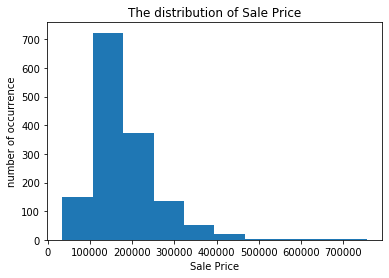

In [47]:
plt.hist(housePrices_df.SalePrice)
plt.title("The distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("number of occurrence")
plt.show()

In [51]:

# Below, we derive the correlations of the features with our target variable irrespective of their signs by taking absolute values.
np.abs(housePrices_df[numeric_columns].iloc[:,1:].corr().loc[:,"SalePrice"]).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

To understand the univariate relation between our target variable and non-numerical features; we plot each feature against the target variable. In the charts below, we show the average sale prices with respect to the each categories of a feature.

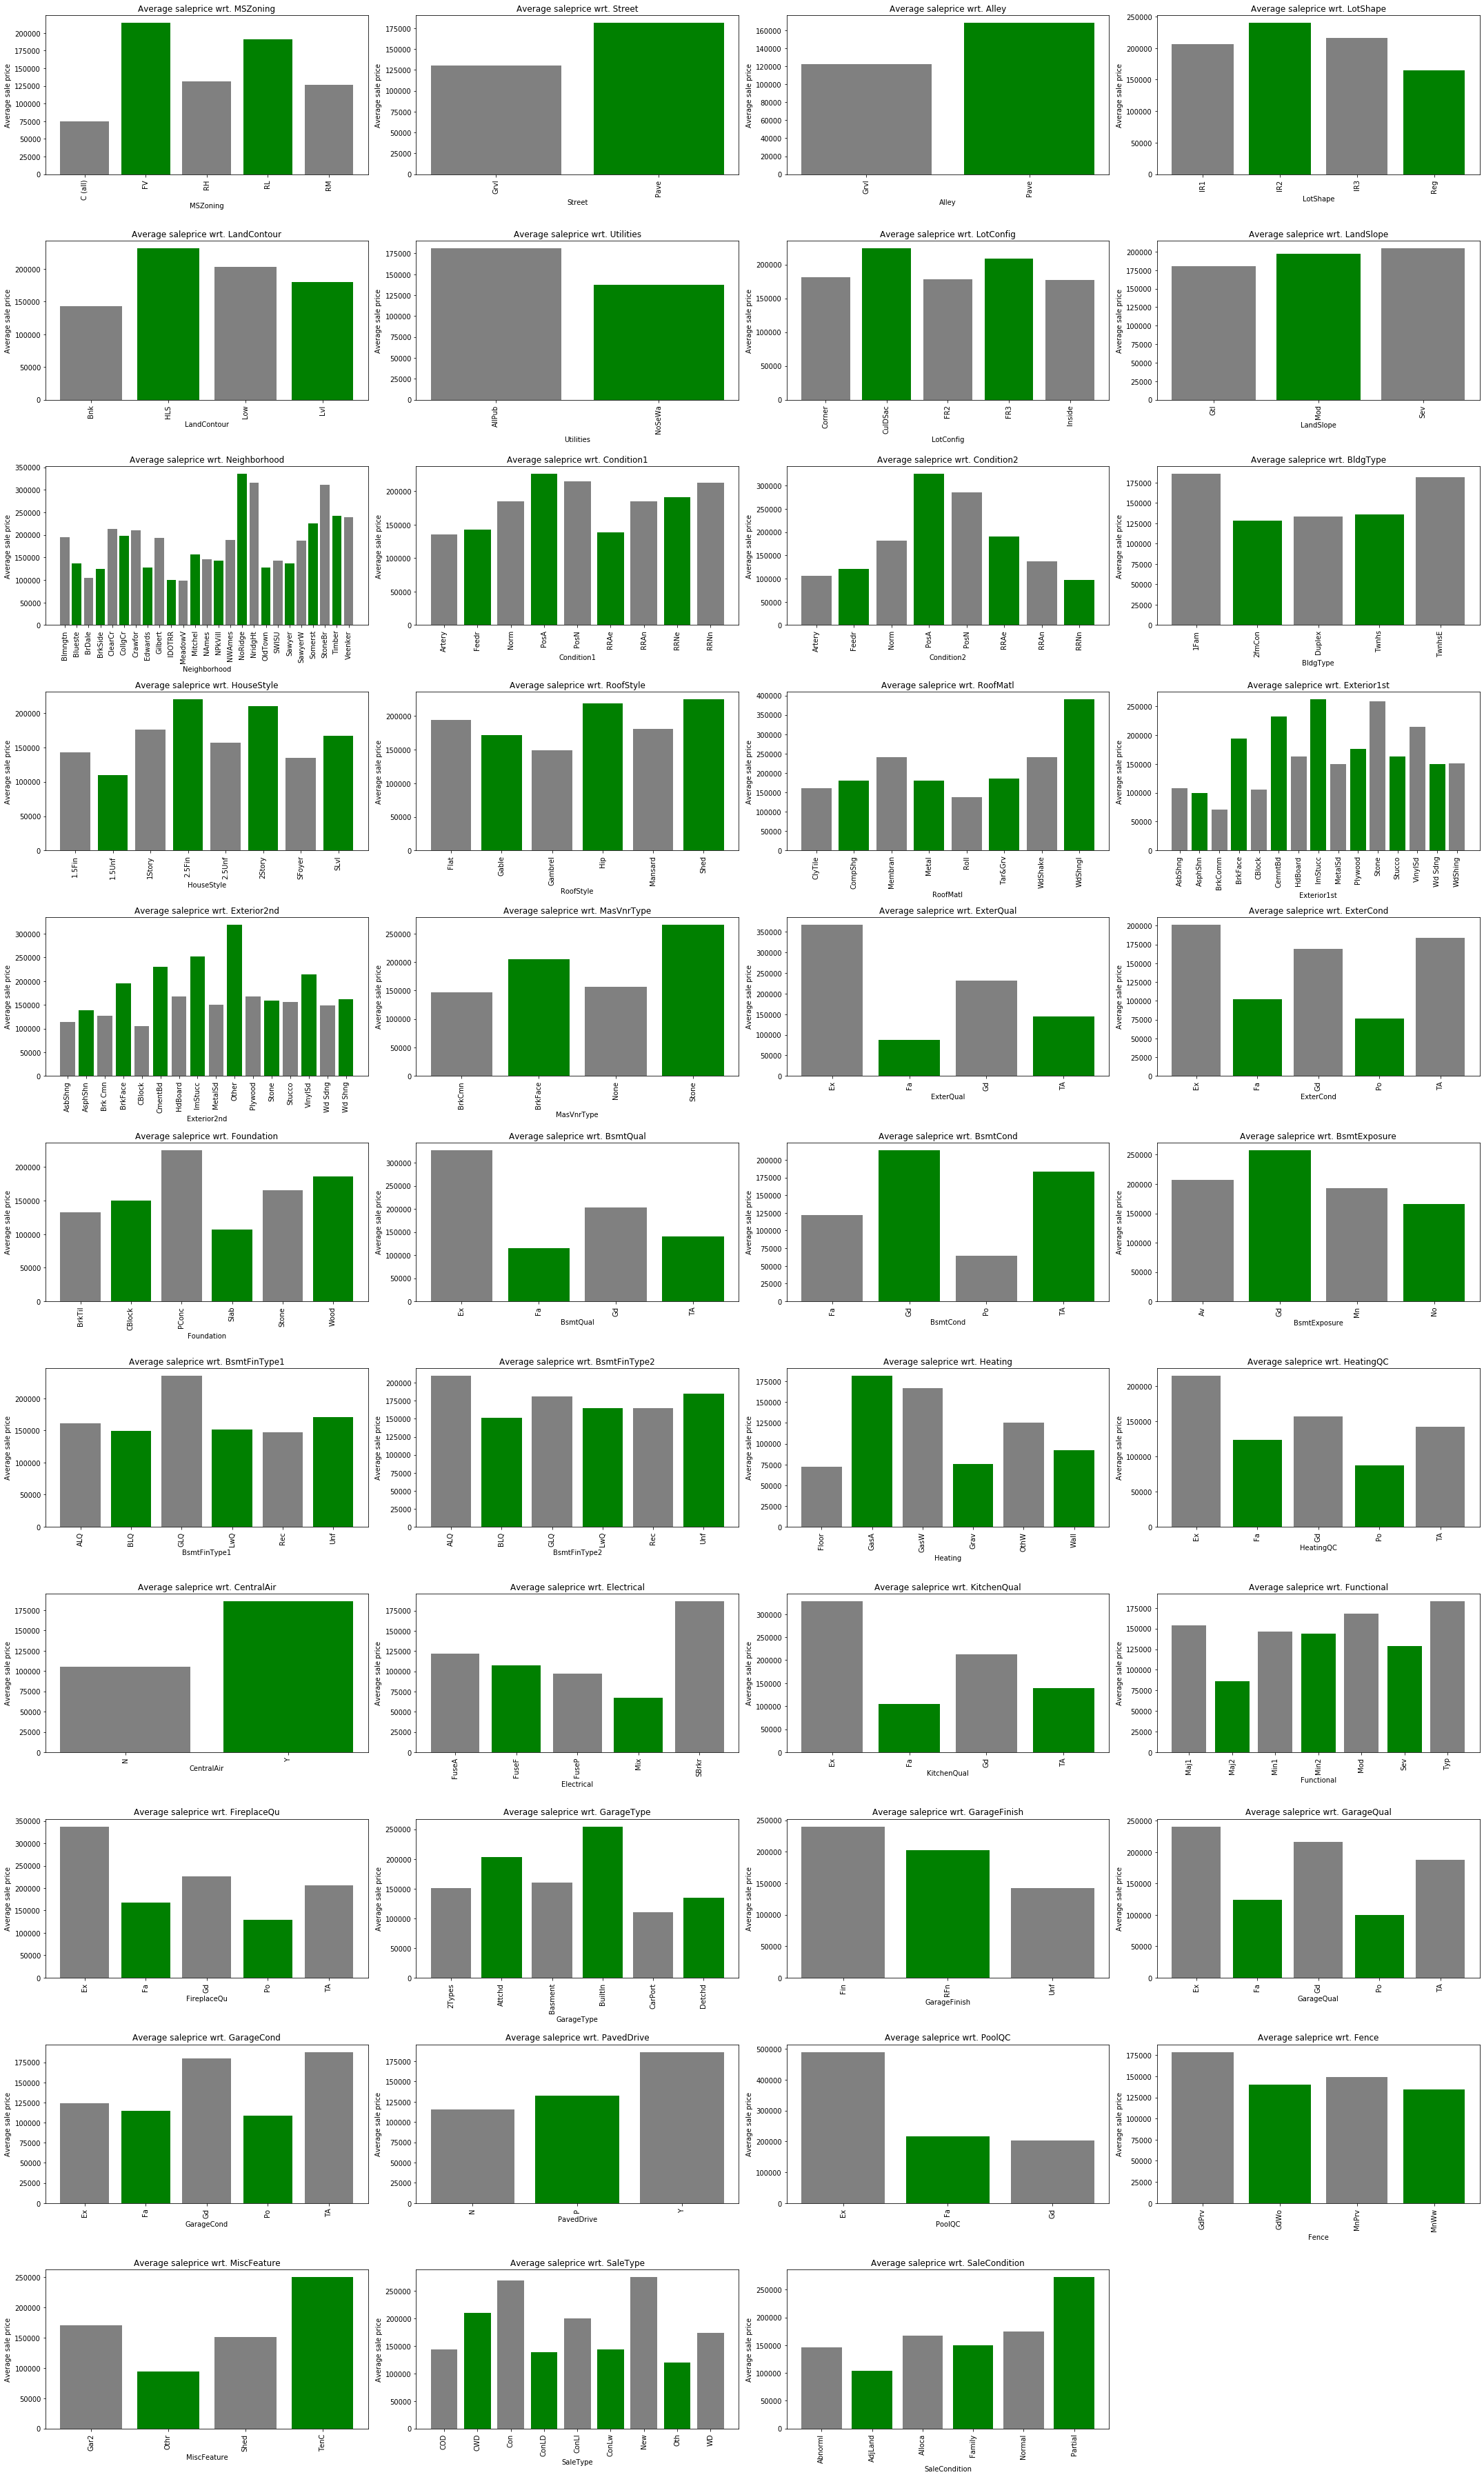

In [53]:
plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(housePrices_df.groupby(column)["SalePrice"].mean().index, housePrices_df.groupby(column)["SalePrice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

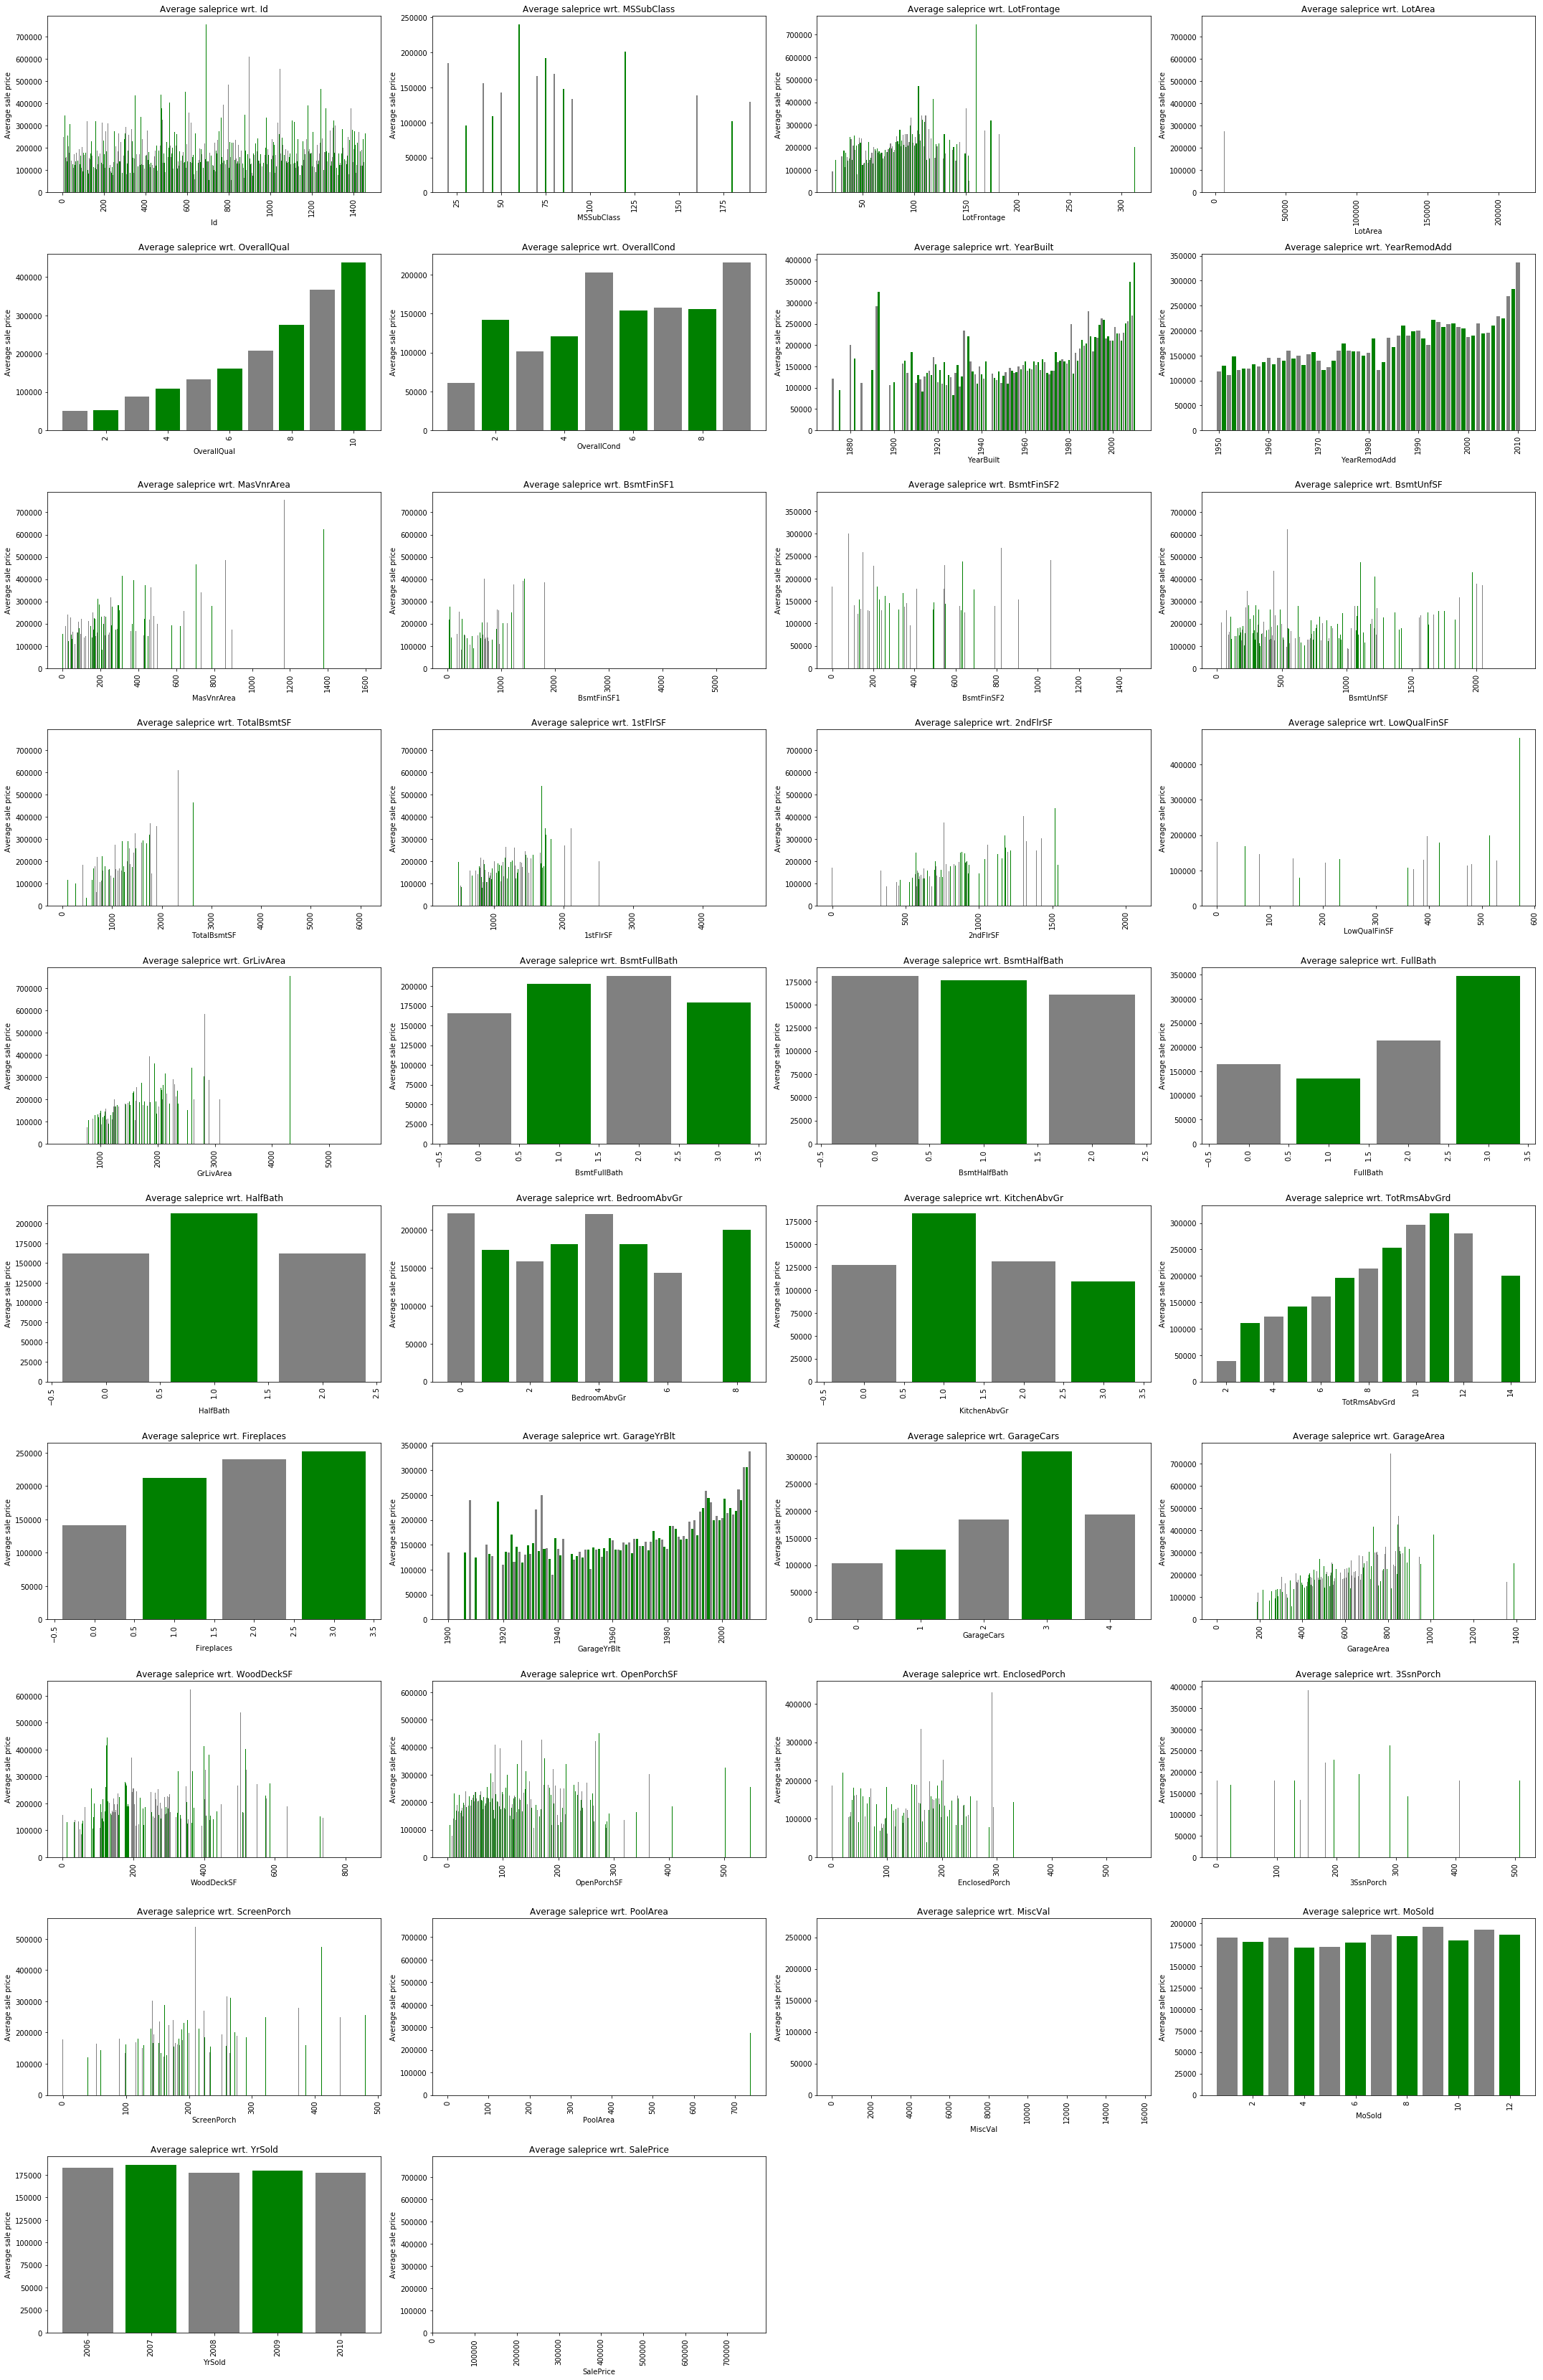

In [65]:
plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(housePrices_df.groupby(column)["SalePrice"].mean().index, housePrices_df.groupby(column)["SalePrice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

As our model, we choose the 5 numerical variables that are most correlated with the sale price. We also add two non-numerical features mszoning and street to our model as their values exhibit some variance with respect to the average sale price. In order to use them in our model, we need to convert them to dummy variables.

In [60]:
housePrices_df = pd.concat([housePrices_df,pd.get_dummies(housePrices_df.MSZoning, prefix="MSZoning", drop_first=True)], axis=1)
housePrices_df = pd.concat([housePrices_df,pd.get_dummies(housePrices_df.Street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(housePrices_df.MSZoning, prefix="MSZoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(housePrices_df.Street, prefix="street", drop_first=True).columns)

### Look at some of the features that can effect house price
consider 
- fullbath	
- halfbath	
- bedroomabvgr	
- fireplaces	
- garagecars  
may play an important role in housing price. So, let's look at whether we see some differences between the price with and without these features


In [ ]:
#plt.bar(housePrices_df2.groupby("bedroomabvgr")["saleprice"].mean().index, housePrices_df2.groupby("bedroomabvgr")["saleprice"].mean(),
    #   color=("pink","blue"))
#plt.title("House Sale price wrt. bedroomabvgr")
#plt.ylabel("House Sale price")
#plt.xlabel("# of bed room")
#plt.xticks([0,8]

## Regression Model
- Build your initial model using these features and estimate the parameters using OLS.

In [61]:
X = housePrices_df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'] + dummy_column_names]
Y = housePrices_df.SalePrice

In [64]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Sat, 04 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:28:47   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
OverallQual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
GrLivArea      45.6344      2.468     18.494      0.000      40.794      50.475
GarageCars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
GarageArea     16.4082     10.402      1.577      0.115      -3.997      36.813
TotalBsmtSF    28.3816      2.931      9.684      0.000      22.633      34.131
MSZoning_FV  8362.5046   4562.459      1.833      0.067    -587.226    1.73e+04
MSZoning_FV  8362.5046   4562.459      1.833      0.067    -587.226    1.73e+04
MSZoning_FV  8362.5046   4562.459      1.833      0.067    -587.226    1.73e+04
MSZoning_RH  4473.4855   5282.272      0.847      0.397   -5888.232    1.48e+04
MSZoning_RH  4473.4855   5282.272      0.847      0.397   -5888.232    1.48e+04
MSZoning_RH  4473.4855   5282.272      0.847      0.397   -5888.232    1.48e+04
MSZoning_RL  9521.9520   4240.253      2.246      0.025    1204.261    1.78e+04
MSZoning_RL  9521.9520   4240.253      2.246      0.025    1204.261    1.78e+04
MSZoning_RL  9521.9520   4240.253      2.246      0.025    1204.261    1.78e+04
MSZoning_RM  3015.9298   4296.911      0.702      0.483   -5412.902    1.14e+04
MSZoning_RM  3015.9298   4296.911      0.702      0.483   -5412.902    1.14e+04
MSZoning_RM  3015.9298   4296.911      0.702      0.483   -5412.902    1.14e+04
street_Pave    75.5188   8145.750      0.009      0.993   -1.59e+04    1.61e+04
street_Pave    75.5188   8145.750      0.009      0.993   -1.59e+04    1.61e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     1.50e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### It looks like 
OverallQual
GrLivArea
GarageCars
TotalBsmtSF 

These are significant since their p-values are < 0.05. 

Garage area does not look so significant pvalue 0.115
Mzoning is categorical and it has both higher and lower then 0.05 pavalue 



In [75]:
#housePrices_df2["bedroomabvgr"].value_counts()
#housePrices_df2["garagecars"].value_counts()
#housePrices_df2["fireplaces"].value_counts()
#housePrices_df2["neighborhood"].value_counts()
#housePrices_df2["halfbath"].value_counts()
#housePrices_df2["yearbuilt"].value_counts()


In [28]:
#housePrices_df2["Neighborhood"].value_counts()

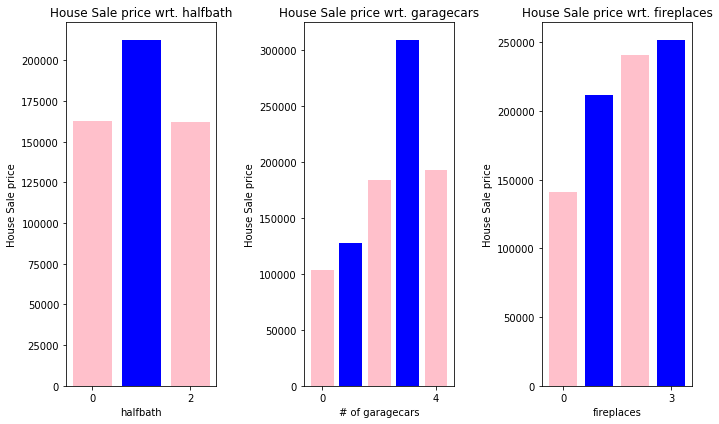

In [13]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)

plt.bar(housePrices_df.groupby("HalfBath")["SalePrice"].mean().index, housePrices_df.groupby("HalfBath")["SalePrice"].mean(),
       color=("pink","blue"))
plt.title("House Sale price wrt. halfbath")
plt.ylabel("House Sale price")
plt.xlabel("halfbath")
plt.xticks([0,2])


plt.subplot(1,3,2)
plt.bar(housePrices_df.groupby("GarageCars")["SalePrice"].mean().index, housePrices_df.groupby("GarageCars")["SalePrice"].mean(),
       color=("pink","blue"))
plt.title("House Sale price wrt. garagecars")
plt.ylabel("House Sale price")
plt.xlabel("# of garagecars")
plt.xticks([0,4])


plt.subplot(1,3,3)
plt.bar(housePrices_df.groupby("Fireplaces")["SalePrice"].mean().index, housePrices_df.groupby("Fireplaces")["SalePrice"].mean(),
       color=("pink","blue"))
plt.title("House Sale price wrt. fireplaces")
plt.ylabel("House Sale price")
plt.xlabel("fireplaces")
plt.xticks([0,3])

plt.tight_layout()
plt.show()


## Magda Question: what else do I need to do here?

